In [1]:
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import numpy as np
from matplotlib import pyplot as plt


# Downloading and showing images


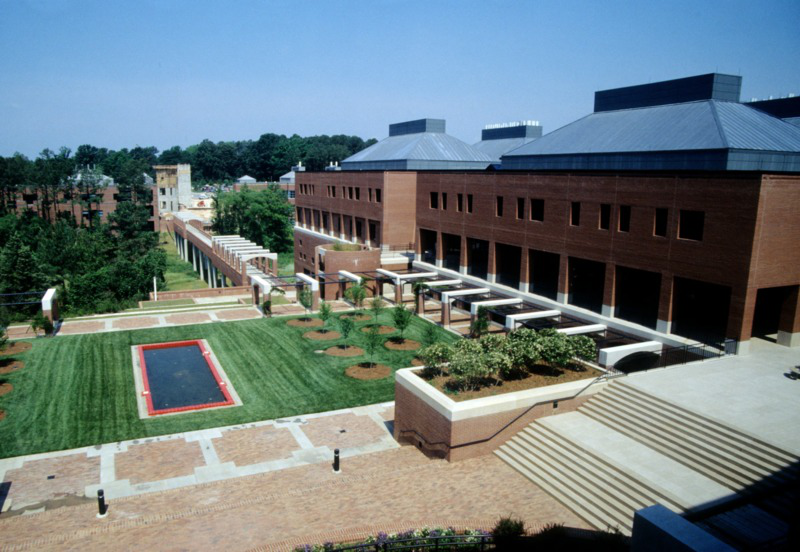

In [2]:

# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"]  

images = []

# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image)
      
  cv2_imshow(image)


# Image brightness and contrast
https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html


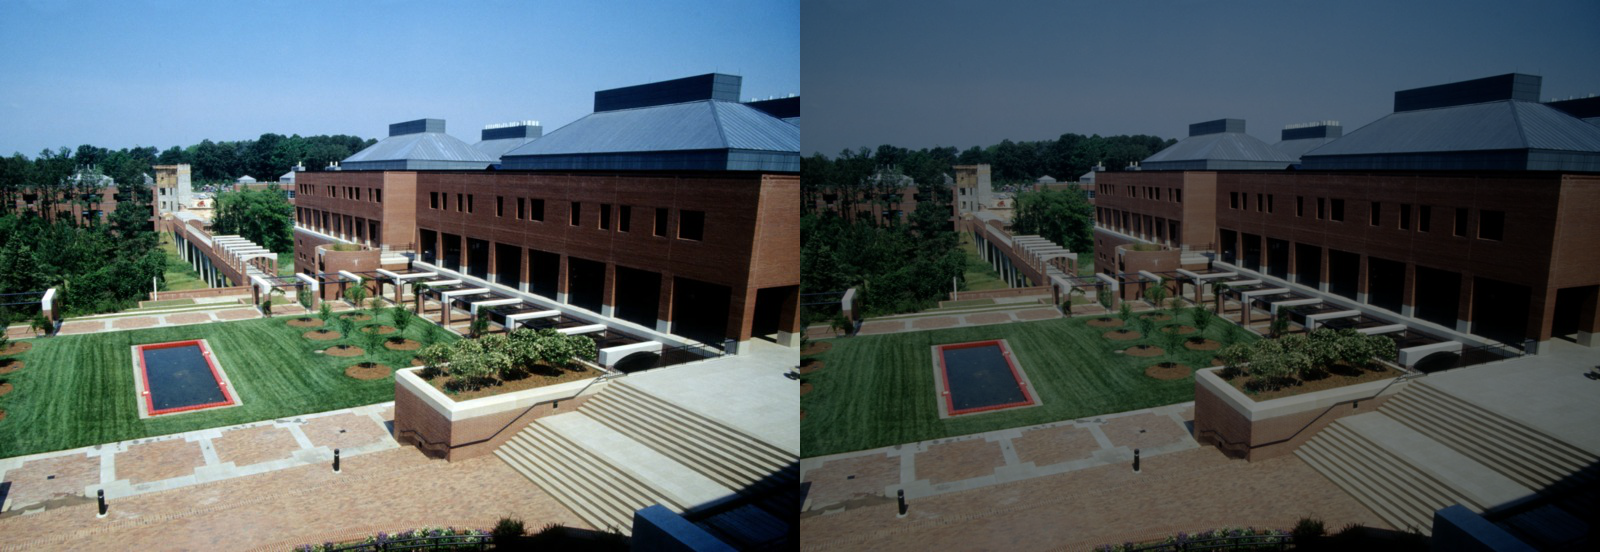

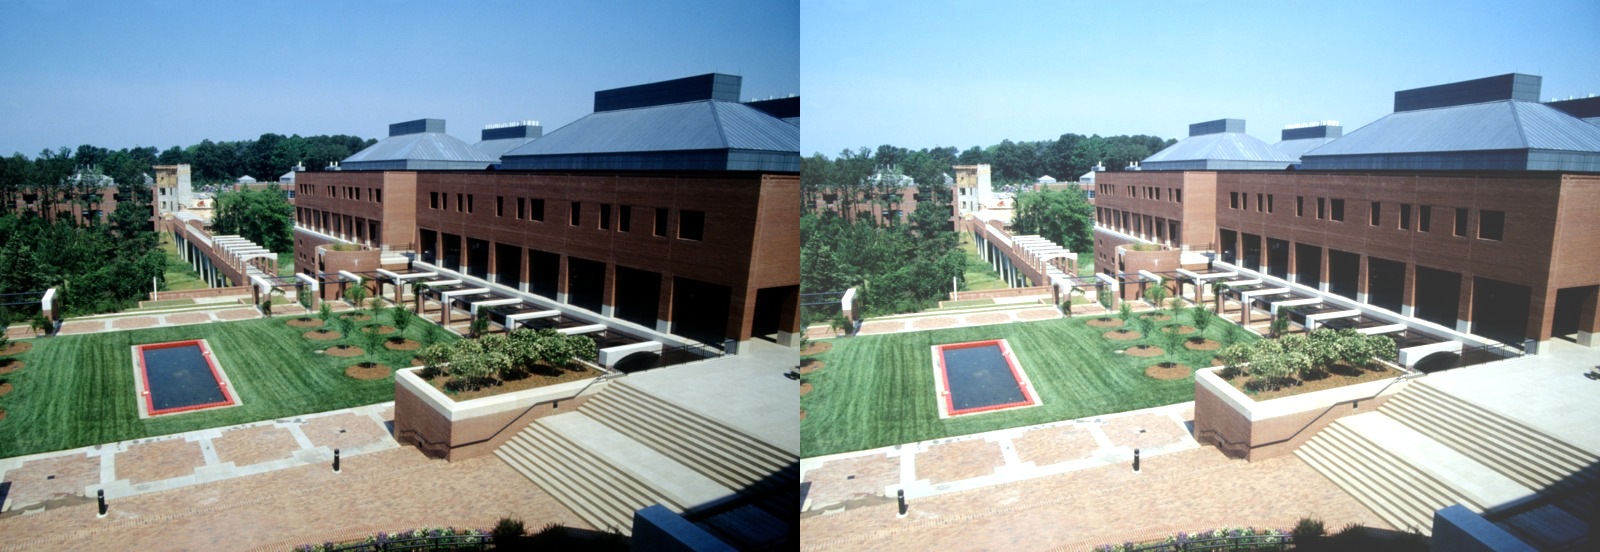

In [3]:
# f(x) = a . f(x) + b

image = images[0].copy()
alpha = 0.5 #  Simple contrast control you can change it and see
beta = 0.0 #  Simple brightness control you can change it and see

contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
combined_images = np.hstack((image, contrast_image))
cv2_imshow(combined_images)

alpha = 1.0 #  Simple contrast control you can change it and see
beta = 50 #  Simple brightness control you can change it and see

brightness_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
combined_images = np.hstack((image, brightness_image))
cv2_imshow(combined_images)



## Image histogram before and after brightness and contrast
https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html

Note that for beta, it is like adding a number to each pixel, which will shift all the histogram values of an image right to this value.
and for alpha it is 



original image histogram


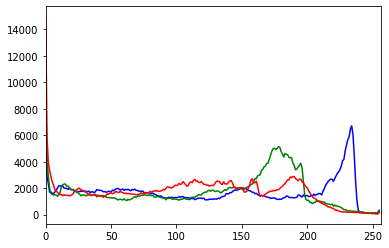

contrast image histogram


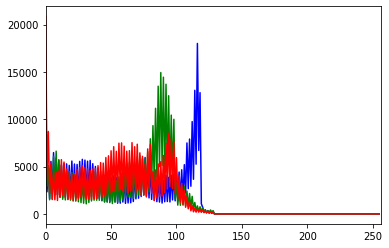

brightness image histogram


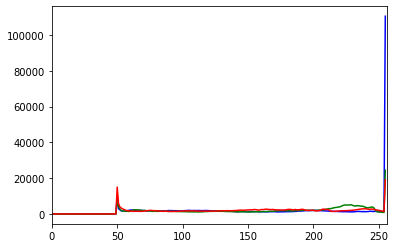

In [4]:
print ("original image histogram")
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

print ("contrast image histogram")
for i,col in enumerate(color):
    histr = cv2.calcHist([contrast_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

print ("brightness image histogram")
for i,col in enumerate(color):
    histr = cv2.calcHist([brightness_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Gamma correction
https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
The gamma correction should tend to add less saturation effect as the mapping is non linear and there is no numerical saturation possible as in the previous method.

Note : A look-up table is used to improve the performance of the computation as only 256 values needs to be calculated once.



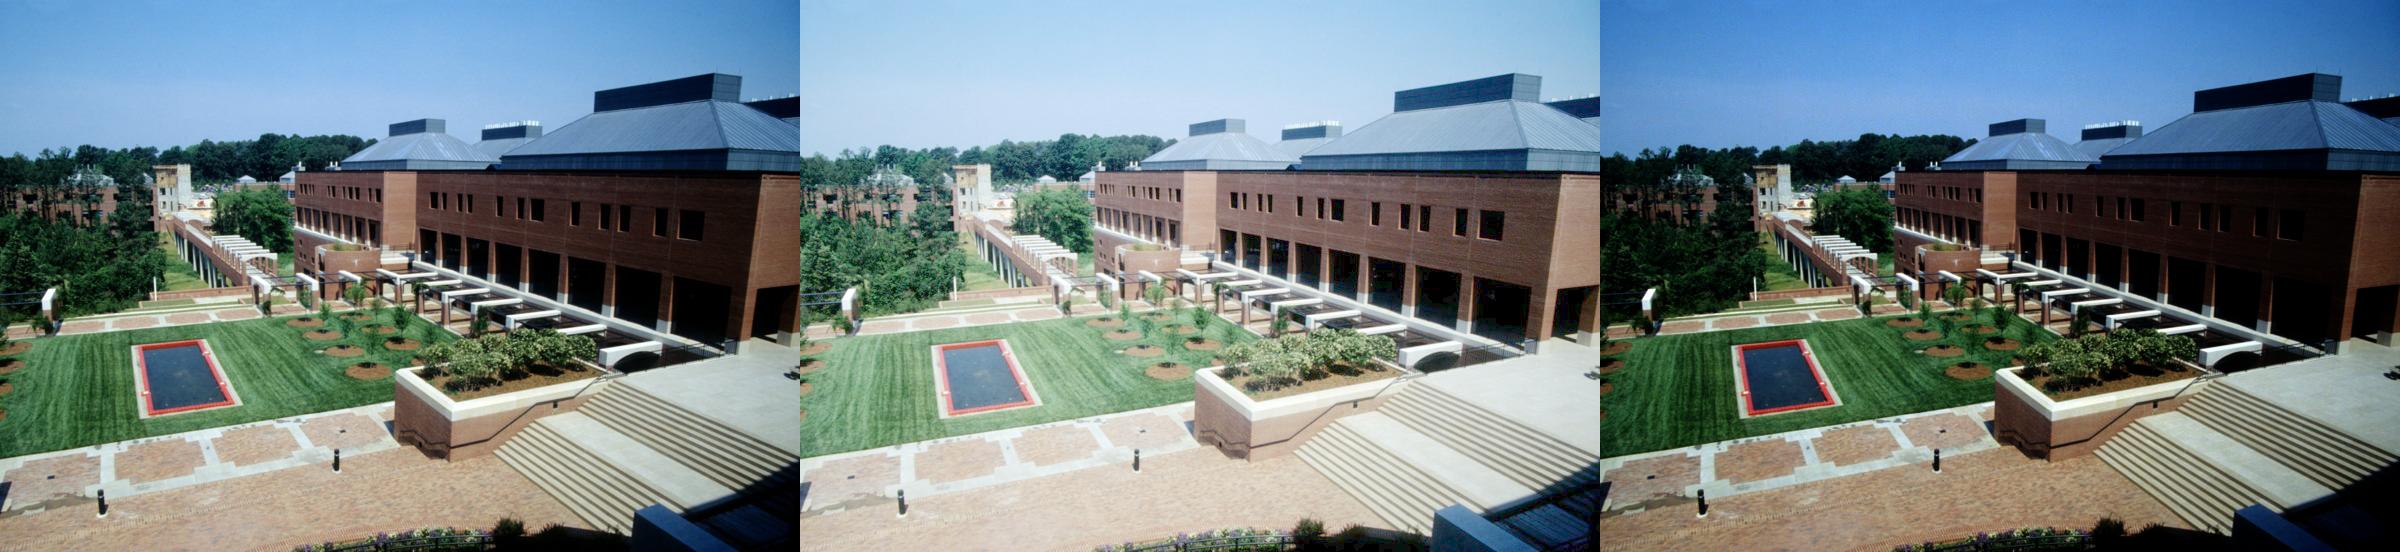

In [10]:
image = images[0].copy()
gamma = 0.5 # When gamma < 1 the original dark regions will be brighter and the
            #histogram will be shifted to the right whereas it will be the 
            #opposite with gamma > 1
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res1 = cv2.LUT(image, lookUpTable)

gamma = 1.5 # When gamma < 1 the original dark regions will be brighter and the
            #histogram will be shifted to the right whereas it will be the 
            #opposite with gamma > 1
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res2 = cv2.LUT(image, lookUpTable)

combined_images = np.hstack((image, res1, res2))
cv2_imshow(combined_images)